## 文本输入

In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key= "sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-omni-turbo",
    messages=[{"role": "user", "content": "你是谁"}],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '我是'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '阿里'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '云'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '研发'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '的大'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '规模'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '语言'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio=

In [ ]:
# 解析输出的Base64 编码的音频数据

import os
from openai import OpenAI
import base64
import numpy as np
import soundfile as sf

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-omni-turbo",
    messages=[{"role": "user", "content": "请用法语简短地介绍大模型"}],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

# 方式1: 待生成结束后再进行解码
# import os
# from openai import OpenAI
# import base64
# import numpy as np
# import soundfile as sf

# audio_string = ""
# for chunk in completion:
#     if chunk.choices:
#         if hasattr(chunk.choices[0].delta, "audio"):
#             try:
#                 audio_string += chunk.choices[0].delta.audio["data"]
#             except Exception as e:
#                 print(chunk.choices[0].delta.audio["transcript"])
#     else:
#         print(chunk.usage)

# wav_bytes = base64.b64decode(audio_string)
# audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
# sf.write("audio_assistant_py.wav", audio_np, samplerate=24000)


# 方式2: 边生成边解码(使用方式2请将方式1的代码进行注释)
# 初始化 PyAudio
import pyaudio
import time
p = pyaudio.PyAudio()
# 创建音频流
stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=24000,
                output=True)

for chunk in completion:
    if chunk.choices:
        if hasattr(chunk.choices[0].delta, "audio"):
            try:
                audio_string = chunk.choices[0].delta.audio["data"]
                wav_bytes = base64.b64decode(audio_string)
                audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
                # 直接播放音频数据
                stream.write(audio_np.tobytes())
            except Exception as e:
                print(chunk.choices[0].delta.audio["transcript"])

time.sleep(0.8)
# 清理资源
stream.stop_stream()
stream.close()
p.terminate()

嗯
…
“
大
模型
”
可以
是
“
Grand
 modèle
”。
不过
这只是
个
很
简单的
说法
哈
。
如果
想
更
准确
或者
详细
点
，
还得
看
具体
是在
哪个
领域
的大
模型
呢
。
你
要是
还有
啥
想法
或者
疑问
，
随时
跟我说
呀
。




In [ ]:
# 解析输出的Base64 编码的音频数据

import os
from openai import OpenAI
import base64
import numpy as np
import soundfile as sf

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-omni-turbo",
    messages=[{"role": "user", "content": "please briefly introduce large model in English"}],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

# 方式1: 待生成结束后再进行解码
# import os
# from openai import OpenAI
# import base64
# import numpy as np
# import soundfile as sf

# audio_string = ""
# for chunk in completion:
#     if chunk.choices:
#         if hasattr(chunk.choices[0].delta, "audio"):
#             try:
#                 audio_string += chunk.choices[0].delta.audio["data"]
#             except Exception as e:
#                 print(chunk.choices[0].delta.audio["transcript"])
#     else:
#         print(chunk.usage)

# wav_bytes = base64.b64decode(audio_string)
# audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
# sf.write("audio_assistant_py.wav", audio_np, samplerate=24000)


# 方式2: 边生成边解码(使用方式2请将方式1的代码进行注释)
# 初始化 PyAudio
import pyaudio
import time
p = pyaudio.PyAudio()
# 创建音频流
stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=24000,
                output=True)

for chunk in completion:
    if chunk.choices:
        if hasattr(chunk.choices[0].delta, "audio"):
            try:
                audio_string = chunk.choices[0].delta.audio["data"]
                wav_bytes = base64.b64decode(audio_string)
                audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
                # 直接播放音频数据
                stream.write(audio_np.tobytes())
            except Exception as e:
                print(chunk.choices[0].delta.audio["transcript"])

time.sleep(0.8)
# 清理资源
stream.stop_stream()
stream.close()
p.terminate()

Well
,
 a
 large
 model
 usually
 refers
 to
 a
 big
 machine
 learning
 or
 deep
 learning
 model
.
 It
 has
 a
 huge
 number
 of
 parameters
.
 For
 example
,
 some
 large
 language
 models
 like
 G
PT
 -

 3
 have
 billions
 of
 parameters
.
 These
 models
 can
 handle
 complex
 tasks
 such
 as
 natural
 language
 understanding
,
 generation
,
 etc
.
 They
're
 trained
 on
 massive
 amounts
 of
 data
.If
 you
 want
 to
 know
 more
 about
 how
 they
 work
 or
 their
 applications
,
 feel
 free
 to
 ask
 me
.




In [ ]:
# 解析输出的Base64 编码的音频数据

import os
from openai import OpenAI
import base64
import numpy as np
import soundfile as sf

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-omni-turbo",
    messages=[{"role": "user", "content": "please briefly introduce large model in French"}],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)


# 方式2: 边生成边解码(使用方式2请将方式1的代码进行注释)
# 初始化 PyAudio
# import pyaudio
# import time
# p = pyaudio.PyAudio()
# # 创建音频流
# stream = p.open(format=pyaudio.paInt16,
#                 channels=1,
#                 rate=24000,
#                 output=True)

# for chunk in completion:
#     if chunk.choices:
#         if hasattr(chunk.choices[0].delta, "audio"):
#             try:
#                 audio_string = chunk.choices[0].delta.audio["data"]
#                 wav_bytes = base64.b64decode(audio_string)
#                 audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
#                 # 直接播放音频数据
#                 stream.write(audio_np.tobytes())
#             except Exception as e:
#                 print(chunk.choices[0].delta.audio["transcript"])

# time.sleep(0.8)
# # 清理资源
# stream.stop_stream()
# stream.close()
# p.terminate()

In [10]:
# 方式1: 待生成结束后再进行解码
import os
from openai import OpenAI
import base64
import numpy as np
import soundfile as sf

audio_string = ""
for chunk in completion:
    if chunk.choices:
        if hasattr(chunk.choices[0].delta, "audio"):
            try:
                audio_string += chunk.choices[0].delta.audio["data"]
            except Exception as e:
                print(chunk.choices[0].delta.audio["transcript"])
    else:
        print(chunk.usage)

wav_bytes = base64.b64decode(audio_string)
audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
sf.write("audio_assistant_introLM_french_py.wav", audio_np, samplerate=24000)

Un
 grand
 modèle
 en
 français
 est
 un
 modèle
 qui
 est
 très
 important
 et
 complex
e
.
 C
'est
 souvent
 utilisé
 dans
 des
 domain
es
 comme
 l
'int
elligence
 art
ific
i
elle
 pour
 trait
er
 de
 grandes
 quant
ités
 de
 données
.
 Par
 exemple
,
 les
 grands
 mod
èles
 sont
 utilis
és
 pour
 la
 reconnaissance
 d
'
images
 ou
 le
 traitement
 du
 lang
age
 nature
l
.
 Ils
 peuvent
 comprend
re
 des
 mill
iards
 de
 param
ètres
 et
 nécess
it
ent
 beaucoup
 de
 res
sources
 informat
iques
 pour
 fonction
ner
 correct
ement
.
 Si
 tu
 as
 plus
 de
 questions
 sur
 ce
 sujet
,
 n
'h
és
ite
 pas
 à
 me
 demand
er
.



APIError: <50002> InternalError.Algo.ModelServingError: Internal Error calling model processing.

## 图片+文本输入

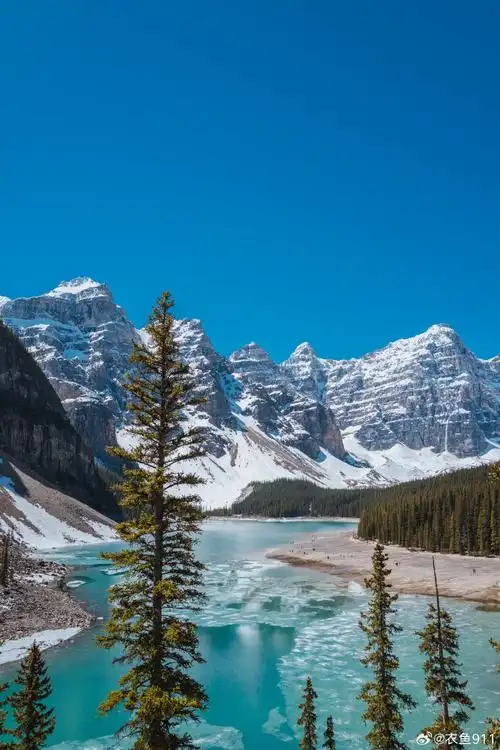

In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key= "sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)


completion = client.chat.completions.create(
    model="qwen2.5-omni-7b",
    messages=[
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."}],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        # "url": "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241022/emyrja/dog_and_girl.jpeg"
                        "url": "https://img2.baidu.com/it/u=3400440858,1802521427&fm=253&fmt=auto&app=120&f=JPEG?w=500&h=750"
                    },
                },
                {"type": "text", "text": "你对于去图中的地方旅游，有什么建议吗？"},
            ],
        },
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Chelsie", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={
        "include_usage": True
    }
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '嗯'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '…'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '首先'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '呢'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '，'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '那'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '地方'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'tr

In [ ]:
# 图片输入
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key= "sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)


completion = client.chat.completions.create(
    model="qwen2.5-omni-7b",
    messages=[
        # {
        #     "role": "system",
        #     "content": [{"type": "text", "text": "You are a helpful assistant."}],
        # },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        # "url": "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241022/emyrja/dog_and_girl.jpeg"
                        "url": "https://img2.baidu.com/it/u=3400440858,1802521427&fm=253&fmt=auto&app=120&f=JPEG?w=500&h=750"
                    },
                },
                # {"type": "text", "text": "图中描绘的是什么景象？"},
            ],
        },
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Chelsie", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={
        "include_usage": True
    }
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '这'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '是一'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '张'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '很'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '美的'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '山'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '景'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'tr

## 音频+文本输入

In [ ]:
# qwen2.5-omni-7b
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen2.5-omni-7b",
    messages=[
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."}],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "input_audio",
                    "input_audio": {
                        "data": "https://dashscope.oss-cn-beijing.aliyuncs.com/audios/welcome.mp3",
                        "format": "mp3",
                    },
                },
                {"type": "text", "text": "这段音频在说什么"},
            ],
        },
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '你'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '只'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '说了'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '“'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '关于'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '使用'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '阿里'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'

In [ ]:
import os
from openai import OpenAI
import base64
import numpy as np
import soundfile as sf

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-omni-turbo",
    messages=[
        # {
        #     "role": "system",
        #     "content": [{"type": "text", "text": "You are a helpful assistant."}],
        # },
        {
            "role": "user",
            "content": [
                {
                    "type": "input_audio",
                    "input_audio": {
                        "data": "https://dashscope.oss-cn-beijing.aliyuncs.com/audios/welcome.mp3",
                        "format": "mp3",
                    },
                },
                # {"type": "text", "text": "这段音频在说什么"},
            ],
        },
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)


# 方式2: 边生成边解码(使用方式2请将方式1的代码进行注释)
# 初始化 PyAudio
import pyaudio
import time
p = pyaudio.PyAudio()
# 创建音频流
stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=24000,
                output=True)

for chunk in completion:
    if chunk.choices:
        if hasattr(chunk.choices[0].delta, "audio"):
            try:
                audio_string = chunk.choices[0].delta.audio["data"]
                wav_bytes = base64.b64decode(audio_string)
                audio_np = np.frombuffer(wav_bytes, dtype=np.int16)
                # 直接播放音频数据
                stream.write(audio_np.tobytes())
            except Exception as e:
                print(chunk.choices[0].delta.audio["transcript"])

time.sleep(0.8)
# 清理资源
stream.stop_stream()
stream.close()
p.terminate()

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '嗯'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '，'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '阿里'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '云'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '有不少'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '功能'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '呢'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'

（有问题，把音频地址作为了上下文）

## 视频+文本输入

In [ ]:
# 图片列表
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen2.5-omni-7b",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "video",
                    "video": [
                        "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241108/xzsgiz/football1.jpg",
                        "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241108/tdescd/football2.jpg",
                        "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241108/zefdja/football3.jpg",
                        "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241108/aedbqh/football4.jpg",
                    ],
                },
                {"type": "text", "text": "描述这个视频的具体过程，并预测视频里的人下一步要做什么"},
            ],
        }
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Chelsie", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '嗯'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '…'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '这个'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '视频'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '呢'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '，'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '就是'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'t

In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen2.5-omni-7b",
    messages=[
        # {
        #     "role": "system",
        #     "content": [{"type": "text", "text": "You are a helpful assistant."}],
        # },
        {
            "role": "user",
            "content": [
                {
                    "type": "video_url",
                    "video_url": {
                        "url": "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241115/cqqkru/1.mp4"
                    },
                },
                # {"type": "text", "text": "视频的内容是什么?"},
            ],
        },
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text", "audio"],
    audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)

ChoiceDelta(content=None, function_call=None, refusal=None, role='assistant', tool_calls=None)
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '嗯'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '，'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '这'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '视频'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '里'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '有个'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'transcript': '女孩'})
ChoiceDelta(content=None, function_call=None, refusal=None, role=None, tool_calls=None, audio={'t

## 图片+音频+视频输入

In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY"),
    api_key="sk-脱敏",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen2.5-omni-7b",
    messages=[
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."}],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "video_url",
                    "video_url": {
                        "url": "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241115/cqqkru/1.mp4"
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        # "url": "https://help-static-aliyun-doc.aliyuncs.com/file-manage-files/zh-CN/20241022/emyrja/dog_and_girl.jpeg"
                        "url": "https://img2.baidu.com/it/u=3400440858,1802521427&fm=253&fmt=auto&app=120&f=JPEG?w=500&h=750"
                    },
                },
                {
                    "type": "input_audio",
                    "input_audio": {
                        "data": "https://dashscope.oss-cn-beijing.aliyuncs.com/audios/welcome.mp3",
                        "format": "mp3",
                    },
                },
                {"type": "text", "text": "输入的这些内容是什么?"},
            ],
        },
    ],
    # 设置输出数据的模态，当前支持两种：["text","audio"]、["text"]
    modalities=["text"],
    # audio={"voice": "Cherry", "format": "wav"},
    # stream 必须设置为 True，否则会报错
    stream=True,
    stream_options={"include_usage": True},
)

for chunk in completion:
    if chunk.choices:
        print(chunk.choices[0].delta)
    else:
        print(chunk.usage)


# 报错:
# BadRequestError: Error code: 400 - {'error': {'code': 'invalid_parameter_error', 'param': None, 'message': 
# '<400> InternalError.Algo.InvalidParameter: Multiple inputs of the same modality or mixed modality inputs are currently not applicable to the omni model.',
#  'type': 'invalid_request_error'}, 'id': 'chatcmpl-c60c6bd0-6d76-9f02-9164-07218df55ba8', 'request_id': 'c60c6bd0-6d76-9f02-9164-07218df55ba8'}

1
